In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Problem Statement : BoomBikes, a US-based bike-sharing provider, seeks to analyze factors influencing daily bike demand post-COVID-19 lockdown. By building a multiple linear regression model using meteorological and behavioral data, the goal is to identify significant predictors of demand and optimize resource allocation, ensuring competitive readiness and enhanced profitability in the revived market.

In [2]:
data = pd.read_csv("C:\\Users\\ronit\\Downloads\\day.csv")

I will now begin to perform preliminary analysis, looking at how data looks like and the various columns

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The data has no null values, however I shall check the columns for any outliers and remove them using the IQR method

In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
data.season.value_counts(normalize=True)

season
3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: proportion, dtype: float64

In [10]:
data.yr.value_counts(normalize=True)

yr
0    0.5
1    0.5
Name: proportion, dtype: float64

In [11]:
data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

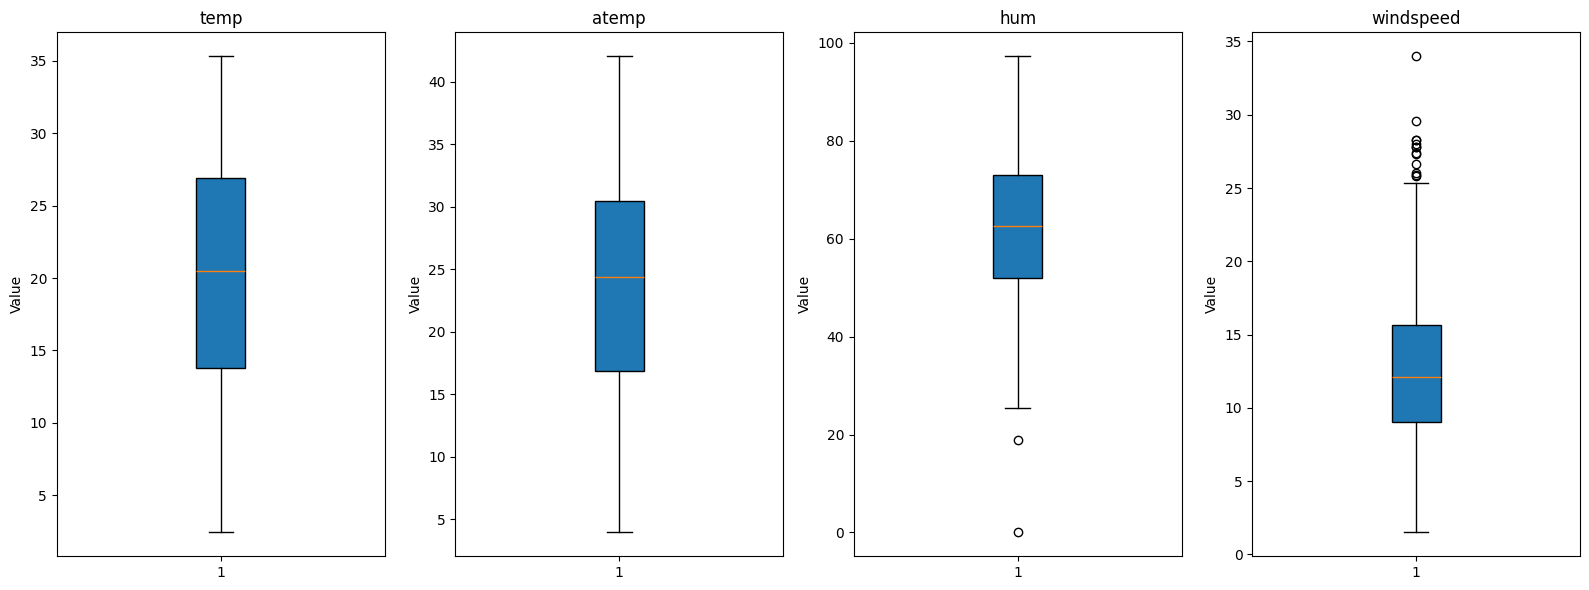

In [12]:
# Define the columns to plot
columns = ['temp', 'atemp', 'hum', 'windspeed']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(columns), figsize=(16, 6), sharey=False)

# Loop through each column and plot its box plot
for i, col in enumerate(columns):
    axes[i].boxplot(data[col], vert=True, patch_artist=True)
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [14]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


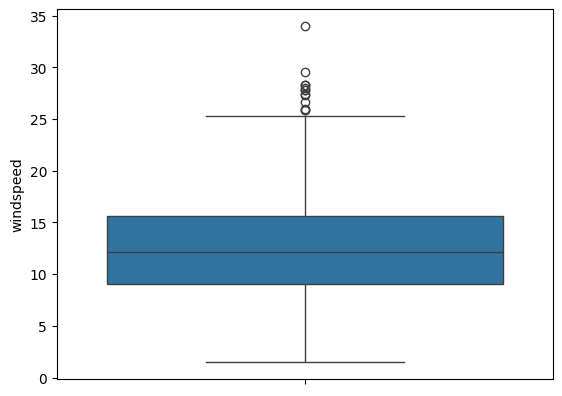

In [15]:
sns.boxplot(data["windspeed"])
plt.show()

In [16]:
data_copy = data.copy()

In [17]:
data_copy.shape

(730, 16)

In [18]:
data_copy.drop_duplicates(inplace =True)

In [19]:
data_copy.shape

(730, 16)

Since the shape is same after drop_duplicates, there seem to be no values that are duplicated.

Now that cleaning the data, removing outliers and checking for duplicate values are done. I will proceed to drop the columns which may not be useful for our analysis

In [20]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping columns with reasons
instant: Just depicts the index of the row hence not needed
dteday: yr,mnth and working data/weekday can be used instead of this column
casual/registered: cnt column can be used as it is the total count of casual + registered users

In [21]:
data.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [22]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


renaming the columns for easier understanding

In [23]:
data.rename(columns={"yr":"year","mnth":"month","cnt":"total_users"},inplace = True)

In [24]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,total_users
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
data.season = data.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [26]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,total_users
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [28]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,total_users
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  total_users  730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Bivariate Analysis

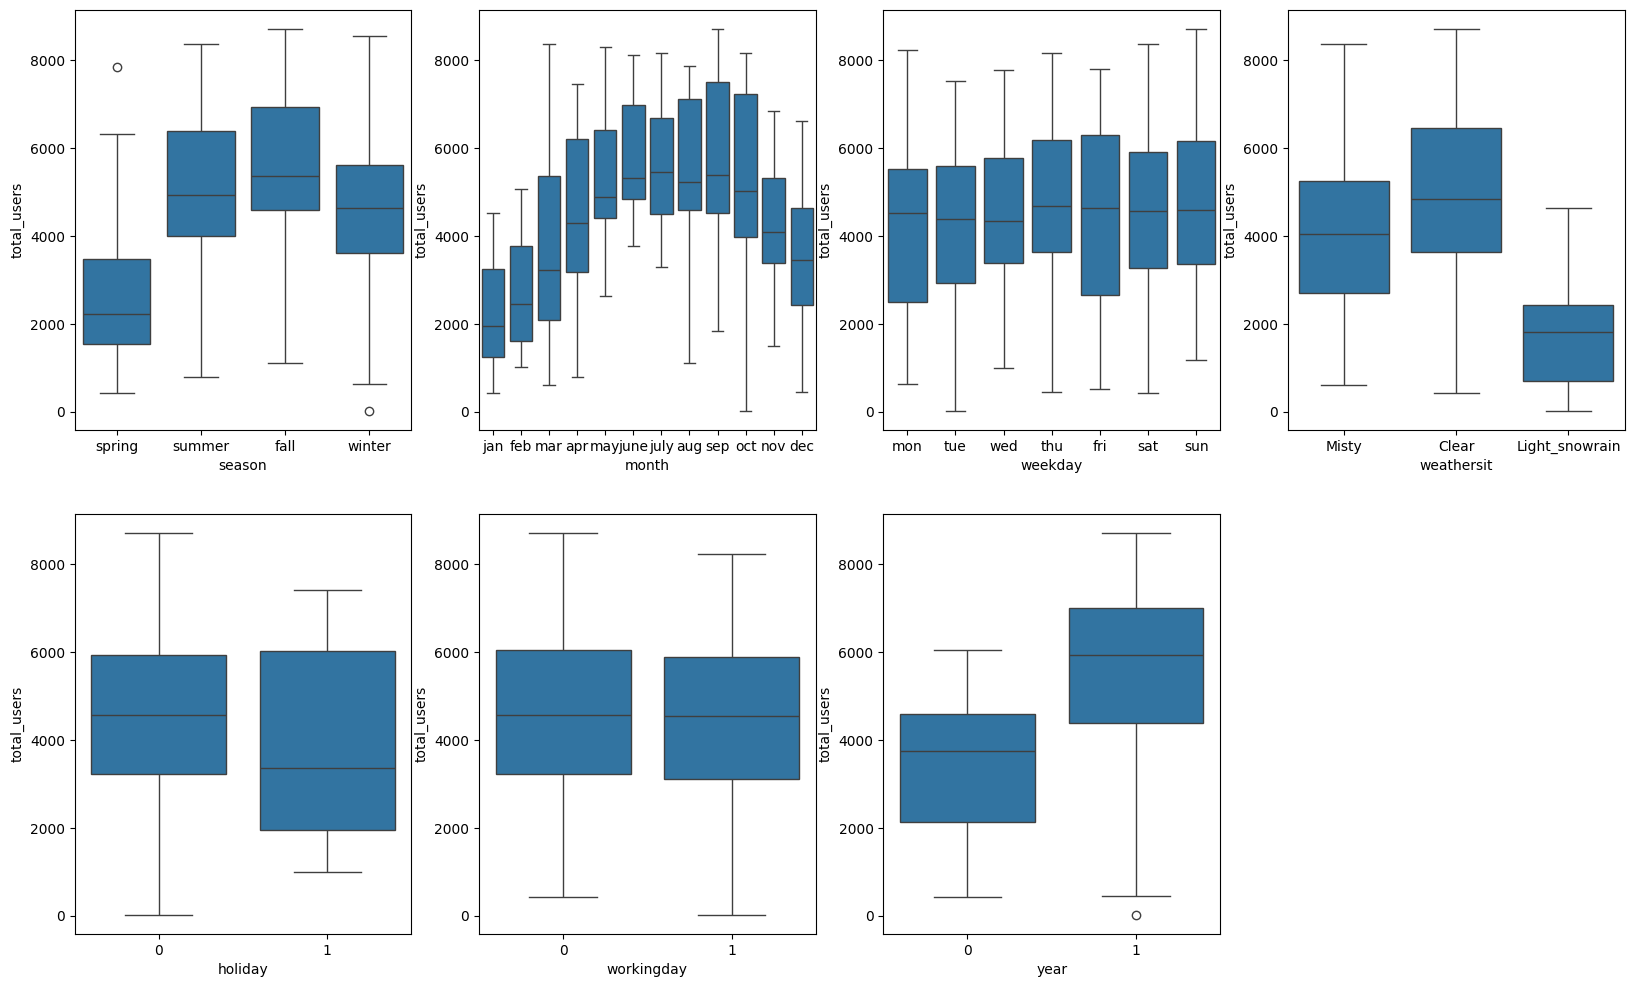

In [30]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'total_users', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'total_users', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'total_users', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'total_users', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'total_users', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'total_users', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'total_users', data = data)
plt.show()

In [31]:
data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'total_users'],
      dtype='object')

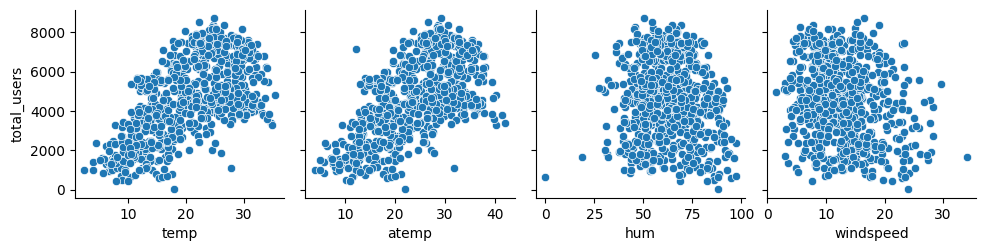

In [32]:
sns.pairplot(x_vars = ["temp","atemp","hum","windspeed"], y_vars = ["total_users"], data = data)

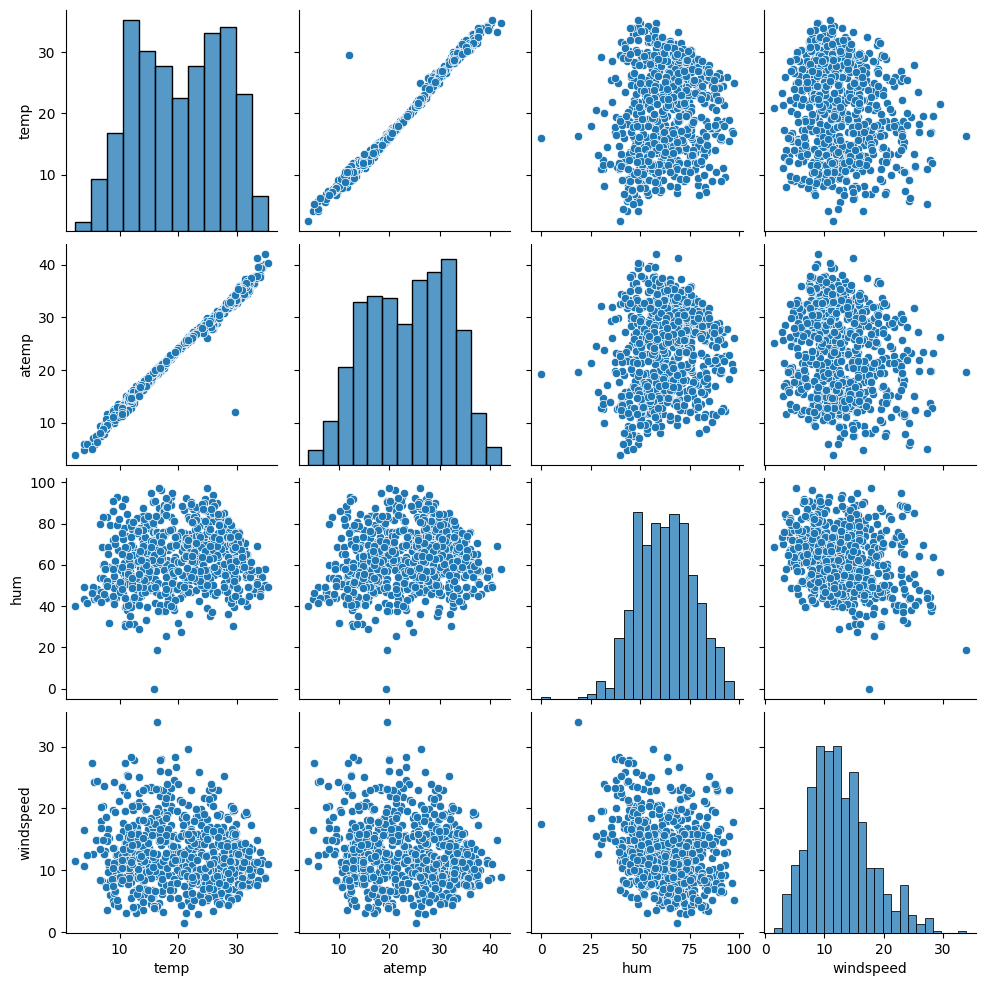

In [33]:
sns.pairplot(vars = ["temp","atemp","hum","windspeed"], data = data)
plt.show()

In [34]:
data_corr = data[["temp","atemp","hum","windspeed","total_users"]]

In [35]:
res = data_corr.corr()

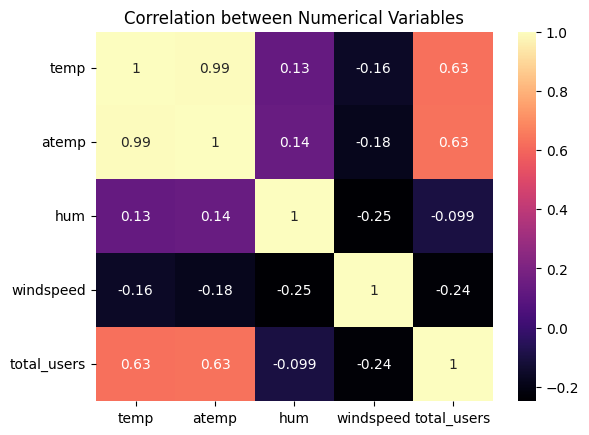

In [36]:
sns.heatmap(res, annot=True, cmap = "magma")
plt.title("Correlation between Numerical Variables")
plt.show()

We can observe multicollinearity between temp, atemp,we can use the VIF i.e variance inflation factor to remove either

Now we will begin modelling the data, for that we must convert the categorical variables into numerical representation we will use one-hot encoding

In [37]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,total_users
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  total_users  730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [39]:
months_data = pd.get_dummies(data['month'], drop_first=True, prefix='month')
weekdays_data = pd.get_dummies(data['weekday'], drop_first=True, prefix='weekday')
weathersit_data = pd.get_dummies(data['weathersit'], drop_first=True, prefix='weathersit')
seasons_data = pd.get_dummies(data['season'], drop_first=True, prefix='season')
months_data = months_data.astype(int)
weekdays_data = weekdays_data.astype(int)
weathersit_data = weathersit_data.astype(int)
seasons_data = seasons_data.astype(int)

# Concatenate the dummy variables back to the original DataFrame
data_encoded = pd.concat([data, months_data, weekdays_data, weathersit_data, seasons_data], axis=1)

# Drop the original categorical columns if you no longer need them
data_encoded = data_encoded.drop(['month', 'weekday', 'weathersit', 'season'], axis=1)

In [40]:
data_encoded

,year,holiday,workingday,temp,atemp,hum,windspeed,total_users,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,1,...,0,0,0,0,0,0,1,1,0,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,1,...,1,0,0,0,0,0,1,1,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,1,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   total_users                730 non-null    int64  
 8   month_aug                  730 non-null    int32  
 9   month_dec                  730 non-null    int32  
 10  month_feb                  730 non-null    int32  
 11  month_jan                  730 non-null    int32  
 12  month_july                 730 non-null    int32  
 13  month_june                 730 non-null    int32  

In [42]:
#Using train test split using train_test_split

In [105]:
df_train, df_test  = train_test_split(data_encoded, train_size = 0.7, test_size = 0.3, random_state = 100)

In [106]:
df_train.shape

(510, 30)

In [107]:
df_test.shape

(219, 30)

In [108]:
#Rescaling of variables
#MinMaxScaling = Normalization (1 - max , 0 - min)
scaler = MinMaxScaler()

num_var = ["temp","atemp","hum","windspeed","total_users"]
df_train[num_var] = scaler.fit_transform(df_train[num_var])


In [47]:
df_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,total_users,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [48]:
df_train[num_var].describe()

,temp,atemp,hum,windspeed,total_users
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


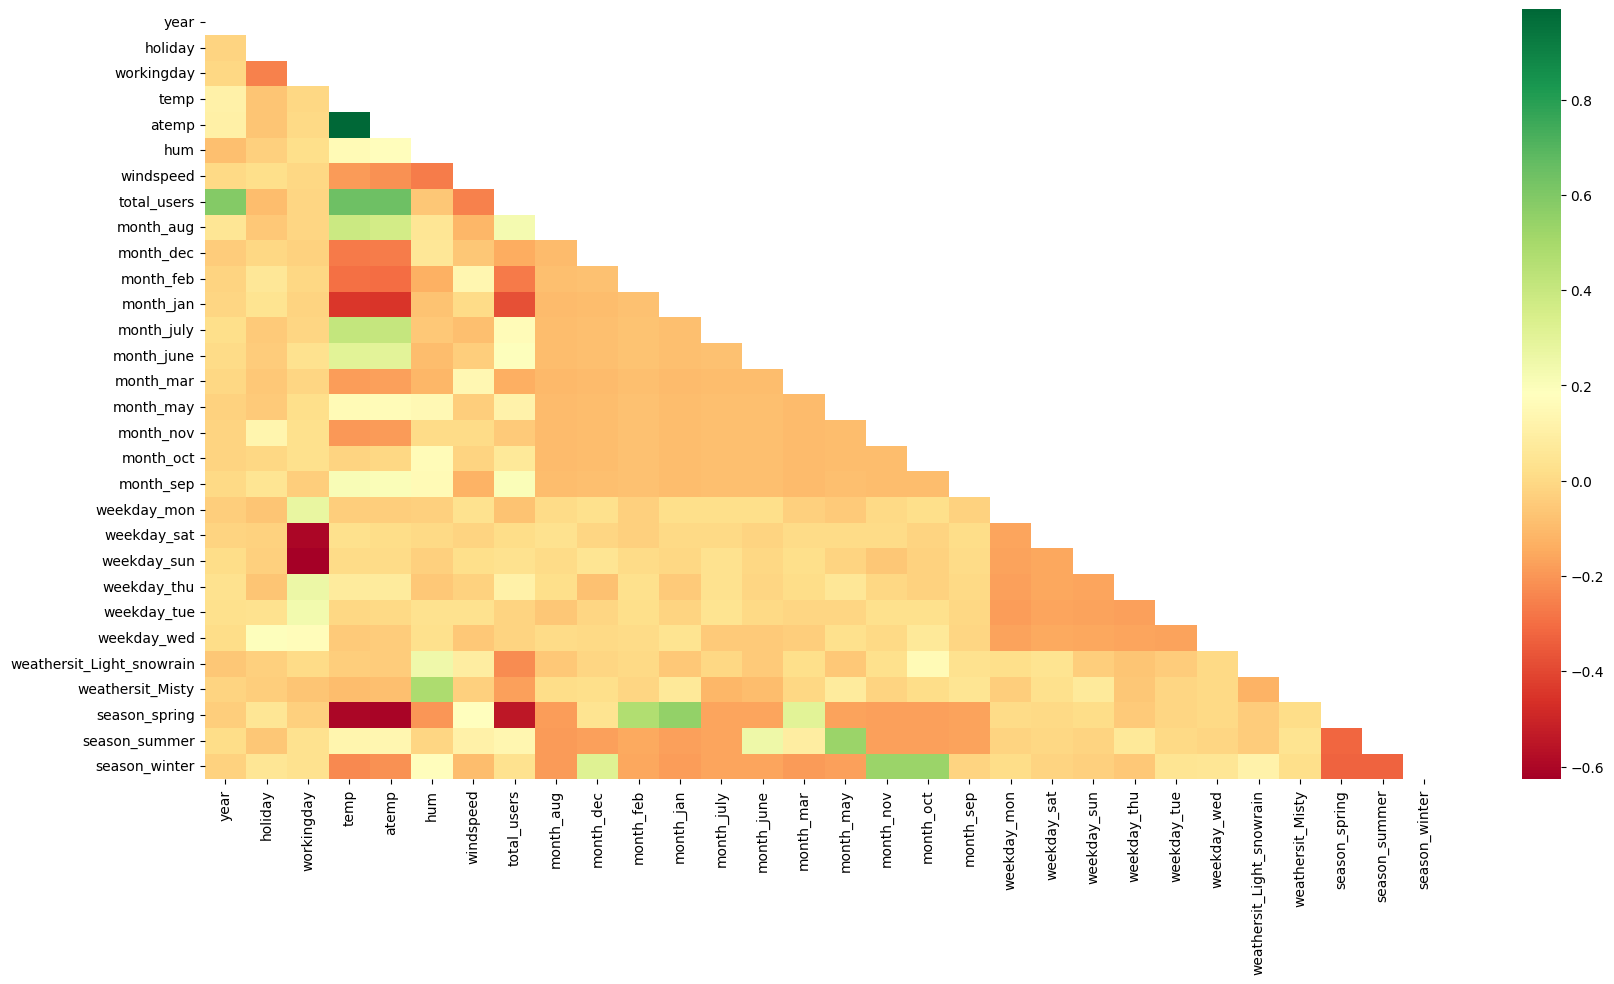

In [49]:
plt.figure(figsize=(20,10))
res = np.triu(df_train.corr())
sns.heatmap(df_train.corr(),cmap="RdYlGn",mask=res )
plt.show()

In [50]:
y_train = df_train.pop("total_users")
X_train = df_train

In [51]:
X_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,month_aug,month_dec,month_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [52]:
#Evaluating the statistical significance of variables
#VIF 

In [53]:
#Recursive feature elimination
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [54]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', True, 1),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'month_dec', 'month_jan',
       'month_july', 'month_nov', 'month_sep', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')


In [56]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_aug', 'month_feb', 'month_june',
       'month_mar', 'month_may', 'month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [57]:
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
X_train_rfe = X_train[col]

In [59]:
X_train_rfe

,year,holiday,temp,hum,windspeed,month_dec,month_jan,month_july,month_nov,month_sep,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
653,1,0,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,0,0,0,0,0,0,1,0,1,0
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,1,0,0
350,0,0,0.248216,0.577930,0.431816,1,0,0,0,0,0,1,0,0,1


In [60]:
VIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,season_spring,4.37
14,season_winter,4.06
13,season_summer,2.81
11,weathersit_Misty,2.32
0,year,2.09
8,month_nov,1.83
6,month_jan,1.75


In [65]:
#We can observe high VIF values for temp and hum

***Bulding the Linear Model***

In [61]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          3.34e-189
Time:                        12:54:12   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

As humidity shows high VIF, i will proceed to drop it

In [62]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [63]:
VIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,season_winter,2.94
11,season_spring,2.89
12,season_summer,2.23
0,year,2.07
7,month_nov,1.80
5,month_jan,1.66
6,month_july,1.59
10,weathersit_Misty,1.56


All the VIF Values are <5 i.e within acceptable limits

In [64]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          1.57e-186
Time:                        12:54:47   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

month_nov shows high p value hence, It will be dropped 

In [66]:
X_train_new = X_train_rfe.drop(['month_nov','hum'], axis = 1)

In [67]:
VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,season_spring,2.89
11,season_summer,2.23
0,year,2.07
12,season_winter,2.06
5,month_jan,1.65
6,month_july,1.59
9,weathersit_Misty,1.56
7,month_sep,1.34


In [68]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'month_dec', 'month_jan',
       'month_july', 'month_sep', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [69]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          1.20e-186
Time:                        13:01:00   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Dropping month_dec because it has a high p value

In [71]:
X_train_new = X_train_rfe.drop(['month_nov','hum','month_dec'], axis = 1)

In [72]:
VIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
9,season_spring,2.75
10,season_summer,2.22
0,year,2.07
11,season_winter,1.79
4,month_jan,1.61
5,month_july,1.59
8,weathersit_Misty,1.56
6,month_sep,1.34


In [73]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'month_jan', 'month_july',
       'month_sep', 'weathersit_Light_snowrain', 'weathersit_Misty',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [74]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          3.97e-187
Time:                        13:01:47   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

dropping month_jan as it has high P value

In [75]:
X_train_new = X_train_rfe.drop(['month_nov','hum','month_dec','month_jan'], axis = 1)

In [76]:
VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,season_summer,2.21
8,season_spring,2.08
0,year,2.07
10,season_winter,1.79
4,month_july,1.58
7,weathersit_Misty,1.55
5,month_sep,1.34
6,weathersit_Light_snowrain,1.08


In [77]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          2.40e-187
Time:                        13:02:13   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We will proceed with this model since the P values are almost close to zero which is statistically significant, the model explains 83.6% of the variance and the F statistic value is 230.4 and prob(F-statistic) is close to 0

In [80]:
cols_f = X_train_new.columns

In [81]:
cols_f

Index(['year', 'holiday', 'temp', 'windspeed', 'month_july', 'month_sep',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')

In [84]:
cols_f = ['year', 'holiday', 'temp', 'windspeed', 'month_july', 'month_sep',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'season_spring',
       'season_summer', 'season_winter']

In [85]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [86]:
#building the finalmodel using sklearn
lr = build_model_sk(X_train[cols_f],y_train)
print(lr.intercept_,lr.coef_)

0.1996475520869042 [ 0.23348246 -0.09801324  0.49150831 -0.1479766  -0.05241824  0.07668552
 -0.28515537 -0.08155822 -0.06694228  0.04528017  0.08308369]


***Residual Analysis***

In [87]:
y_train_pred = lr.predict(X_train[cols_f])

In [95]:
#Plot a histogram of the error terms
def plot_res(act, pred):
    sns.displot(act-pred,kde = True)
    plt.title('Error Terms')
    plt.xlabel('Errors')

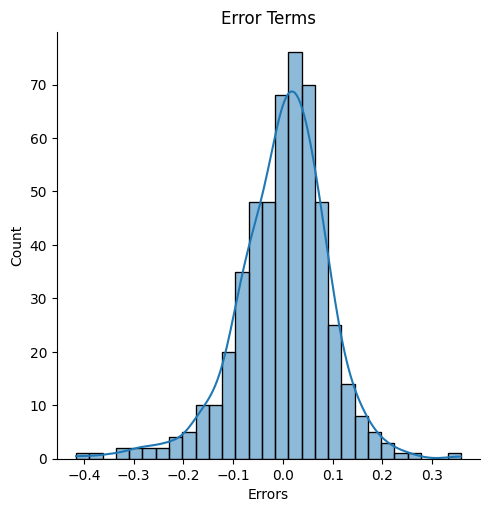

In [96]:
plot_res(y_train, y_train_pred)

We can observe that the error terms are normally distributed 

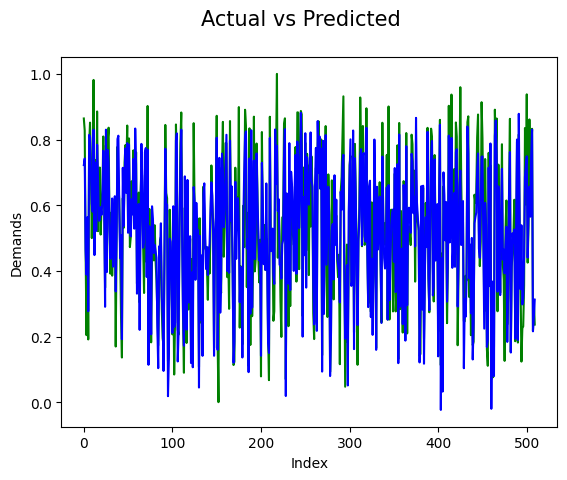

In [103]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

***Model Evaluation***

In [99]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8357767594654057

The Model is able to explain 83.5% of the variance

In [115]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_users   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          2.40e-187
Time:                        14:59:18   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

***Conclusion***
following variables are significant to predict the demand for shared bikes

holiday
temp
hum
windspeed
Season - (summer winter spring)
months(January, July, September, November, December)
Year
Sunday
weathersit( Light Snow, Misty)_